# Simulación de Monte Carlo

## Juego de cartas

Sea una mazo de naipes francés con 52 cartas divididas en cuatro palos: corazones, treboles, diamantes y picas. Cada palo tiene 13 cartas: el as, los números del 2 al 10, la jota, la reina y el rey. 

<img src="images/cards.png">

Si barajamos las cartas desordenando el mazo, ¿Cuál es la probabilidad de que aparezcan **al menos** dos reyes juntos?

En este ejercicio se pide que realice una simulación de Monte Carlo para resolver este problema

1. Escriba una función que cree una lista con las 52 cartas 
1. Baraje las cartas, puede usar la función [`shuffle`](https://docs.python.org/3/library/random.html#random.shuffle) del módulo `random`
1. Escriba una función que verifique si hay al menos dos reyes juntos
1. Repita $N$ veces. Grafique la probabilidad de obtener al menos dos reyes versus $N$. Considere un espaciado logarítmico para $N$
1. La solución analítica para este problema es $0.217376$. Compare su resultado con esta solución analítica

In [78]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [23]:
tipos= ["corazon", "trebol", "diamante", "pica"]
valor= [x for x in range(1, 14)]
mazo= [(i,j) for j in tipos for i in valor]



In [57]:
def verify_kings_together(baraja):
    for i, card in enumerate(baraja[1:]):
        if card[0] == baraja[i][0] == 13:
            
            return 1
    return 0    
    
    

In [74]:
vector = [int(x) for x in np.logspace(1, 6, num=10)]
results= []

for N in vector:
    contador=0
    for i in range(N):
        random.shuffle(mazo)
        contador = contador + verify_kings_together(mazo)
    results.append(contador/N)
    
print(results)        
        
        

[0.1, 0.22857142857142856, 0.29457364341085274, 0.22413793103448276, 0.23501199040767387, 0.21021021021021022, 0.21834385443743037, 0.2170976157879782, 0.21801225494600276, 0.217685]


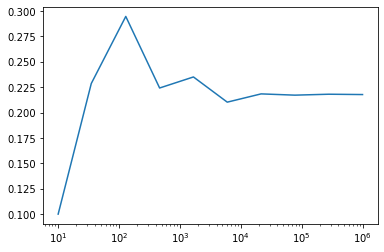

In [83]:
fig, ax = plt.subplots()
ax.plot(vector, results)
plt.xscale("log")

## Caminata aleatoria económica

Considere la siguiente rutina que recopila el precio de cierre y las retornos (diferencia entre precios de cierre sucesivos) de las acciones de Apple desde 2009 hasta 2019


In [ ]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web # conda install pandas-datareader
%matplotlib notebook
import matplotlib.pyplot as plt

start, end = dt.datetime(2009, 12, 30), dt.datetime(2019, 5, 29)
prices = web.DataReader('AAPL', 'yahoo', start, end)['Close']

fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
prices.plot(ax=ax);

Utilice una simulación por Monte-Carlo para predecir el precio de la acción en los próximos 500 días

Para esto considere un modelo de movimiento aleatorio de tipo Browniano

$$
P_t = P_{t-1} e^{\alpha + z_t \sigma}
$$

donde la variación en el precio de cierre está explicada por un compontente constante y otro aleatorio

- $\alpha$ es el promedio de $\log P_t / P_{t-1}$
- $\sigma$ es la desviación estándar de $\log P_t / P_{t-1}$
- $z_t \sim N(0, 1)$

Muestre el resultado como un cono de probabilidad